# Load dataset

In [1]:
from datasets import load_dataset
dataset = load_dataset("imvladikon/hebrew_speech_kan",  cache_dir='datasets/train3', split="train+validation")

C:\Users\sean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Word Count

In [2]:
from tqdm.auto import tqdm

def calc_word_count(dataset):
    word_count = {}
    for i in tqdm(range(len(dataset['sentence']))):
        for word in dataset['sentence'][i].split():
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

    return word_count

In [3]:
word_count = calc_word_count(dataset)

100%|██████████| 10000/10000 [03:18<00:00, 50.42it/s]


# Plot

In [22]:
def plot(dataset,word_count):
    # Find most common words in the dataset
    from collections import Counter
    print(dataset.column_names)


    # Plot the 50 most common words
    import matplotlib.pyplot as plt
    word_count = word_count.items()
    word_count = sorted(word_count, key=lambda x: x[1], reverse=True)
    word_count = word_count[:50]
    x = [i[0][::-1] for i in word_count]
    y = [i[1] for i in word_count]

    # Make x-axis words vertical
    plt.figure(figsize=(20, 10))

    # Customize the titles with larger font sizes
    plt.xlabel('Words', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.title('The 50 Most Common Words in the Dataset', fontsize=22)

    # Plot the data and rotate the x-axis labels vertically
    plt.bar(x, y)
    plt.xticks(rotation=90, ha='center', fontsize=12)
    plt.show()

['audio', 'sentence']


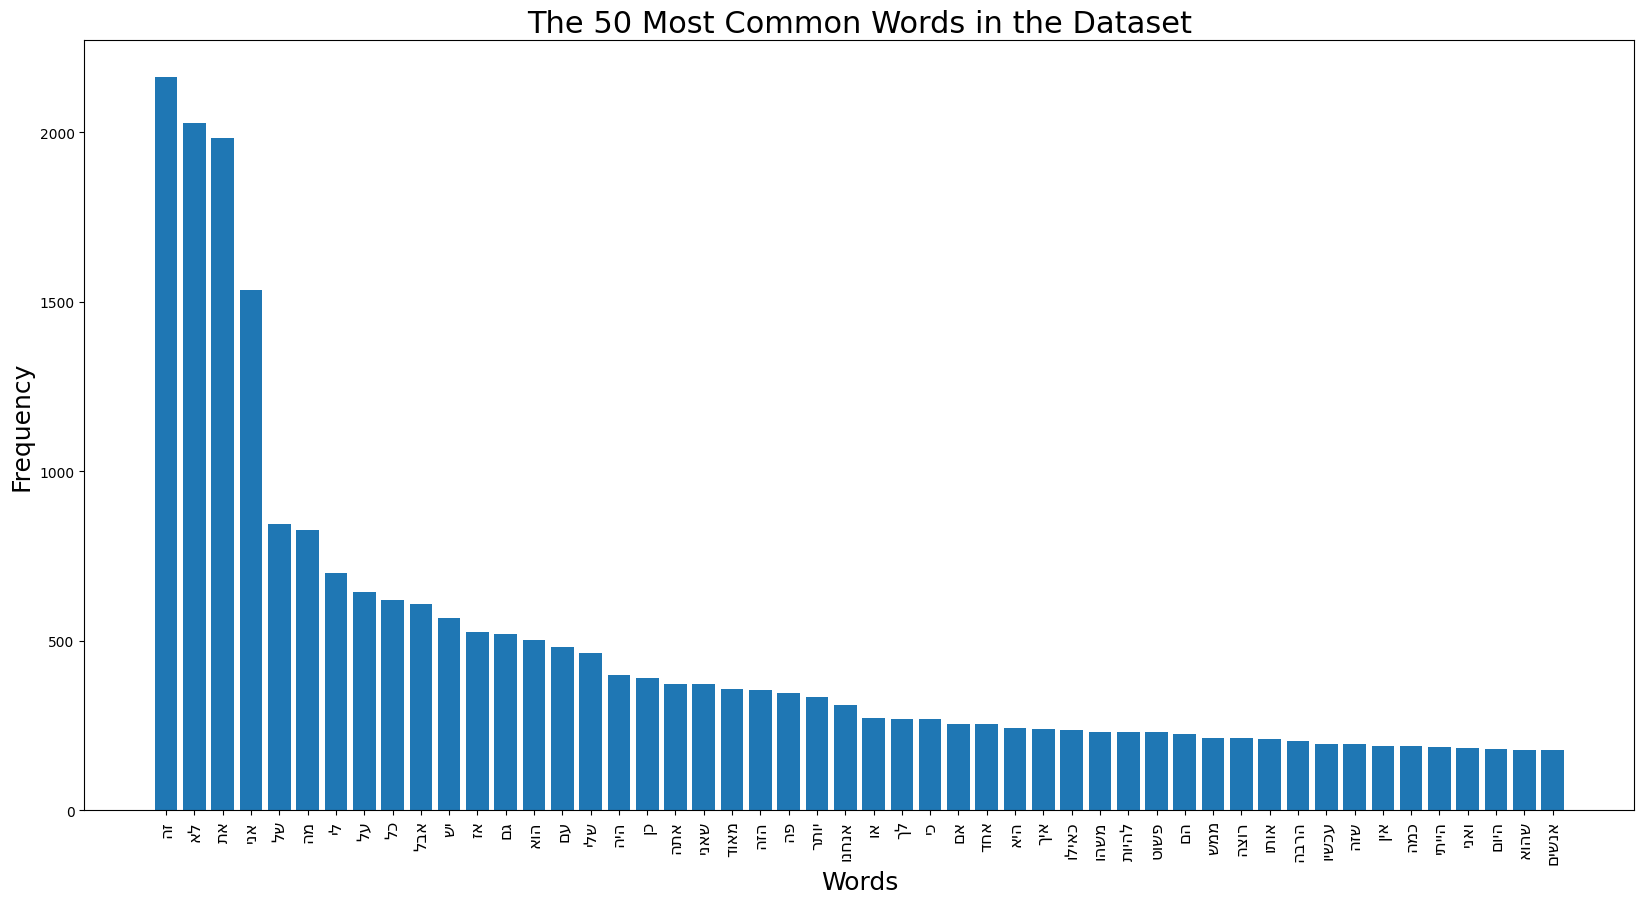

In [23]:
plot(dataset, word_count)